# models comparison: finding out the correlation between niv formula and eta


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit


# both color number

Saved: 14_RL_agent_TDlearn_output_model_comparison_niv_paper\models_evaluation_corr_eta_alphas_both.pdf


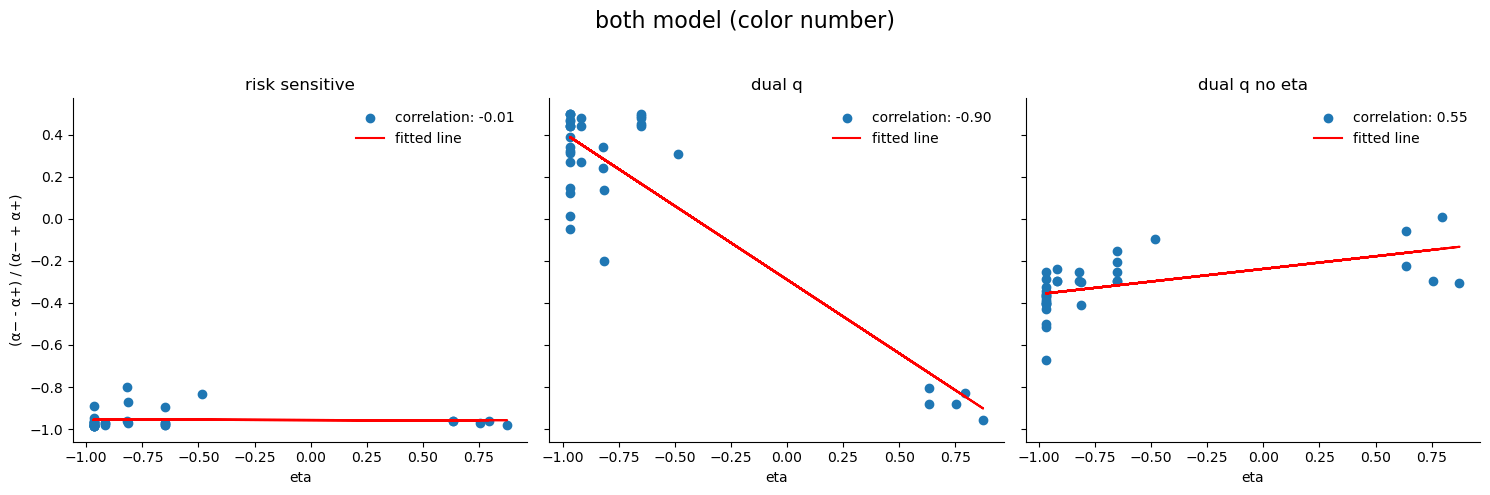

In [2]:
output_dir = r"14_RL_agent_TDlearn_output_model_comparison_niv_paper"
os.makedirs(output_dir, exist_ok=True)

file_dualQ = "13_RL_agent_TDlearn_output_risk_dualQ/models_evaluation.csv"
file_risk_sensitive = "13_RL_agent_TDlearn_output_risk_sensitive/models_evaluation.csv"
file_dualQ_no_eta = "13_RL_agent_TDlearn_output_risk_dualQ_no_eta/models_evaluation.csv"


df_dualQ = pd.read_csv(file_dualQ)
df_risk_sensitive = pd.read_csv(file_risk_sensitive)
df_dualQ_no_eta = pd.read_csv(file_dualQ_no_eta)


best_etas = df_dualQ["best_eta"]


best_alphas_r_dualQ = df_dualQ["best_alpha_r"]
best_alphas_s_dualQ = df_dualQ["best_alpha_s"]


best_alphas_r_dualQ_no_eta = df_dualQ_no_eta["best_alpha_r"]
best_alphas_s_dualQ_no_eta = df_dualQ_no_eta["best_alpha_s"]


best_alphas_plus_risk_sensitive = df_risk_sensitive["best_alpha_plus"]
best_alphas_minus_risk_sensitive = df_risk_sensitive["best_alpha_minus"]




############################visualization############################
############################visualization############################

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Risk Sensitive
x_risk_sensitive = best_etas
y_risk_sensitive = (best_alphas_minus_risk_sensitive - best_alphas_plus_risk_sensitive) / (best_alphas_minus_risk_sensitive + best_alphas_plus_risk_sensitive)
corr_risk_sensitive = np.corrcoef(x_risk_sensitive, y_risk_sensitive)[0, 1]
axes[0].scatter(x_risk_sensitive, y_risk_sensitive, label=f"correlation: {corr_risk_sensitive:.2f}")
m, b = np.polyfit(x_risk_sensitive, y_risk_sensitive, 1)
axes[0].plot(x_risk_sensitive, m * x_risk_sensitive + b, color='red', label="fitted line")
axes[0].set_title("risk sensitive")
axes[0].set_xlabel("eta")
axes[0].set_ylabel("(α− - α+) / (α− + α+)")
axes[0].legend(frameon=False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Dual Q
x_dualQ = best_etas
y_dualQ = (best_alphas_s_dualQ - best_alphas_r_dualQ) / (best_alphas_s_dualQ + best_alphas_r_dualQ)
corr_dualQ = np.corrcoef(x_dualQ, y_dualQ)[0, 1]
axes[1].scatter(x_dualQ, y_dualQ, label=f"correlation: {corr_dualQ:.2f}")
m, b = np.polyfit(x_dualQ, y_dualQ, 1)
axes[1].plot(x_dualQ, m * x_dualQ + b, color='red', label="fitted line")
axes[1].set_title("dual q")
axes[1].set_xlabel("eta")
axes[1].legend(frameon=False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Dual Q No Eta
x_dualQ_no_eta = best_etas
y_dualQ_no_eta = (best_alphas_s_dualQ_no_eta - best_alphas_r_dualQ_no_eta) / (best_alphas_s_dualQ_no_eta + best_alphas_r_dualQ_no_eta)
corr_dualQ_no_eta = np.corrcoef(x_dualQ_no_eta, y_dualQ_no_eta)[0, 1]
axes[2].scatter(x_dualQ_no_eta, y_dualQ_no_eta, label=f"correlation: {corr_dualQ_no_eta:.2f}")
m, b = np.polyfit(x_dualQ_no_eta, y_dualQ_no_eta, 1)
axes[2].plot(x_dualQ_no_eta, m * x_dualQ_no_eta + b, color='red', label="fitted line")
axes[2].set_title("dual q no eta")
axes[2].set_xlabel("eta")
axes[2].legend(frameon=False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

plt.suptitle("both model (color number)", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
filename = os.path.join(output_dir, "models_evaluation_corr_eta_alphas_both.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()


# different correlation for positive and negative eta

Saved: 14_RL_agent_TDlearn_output_model_comparison_niv_paper\models_evaluation_corr_eta_alphas_both_separate.pdf


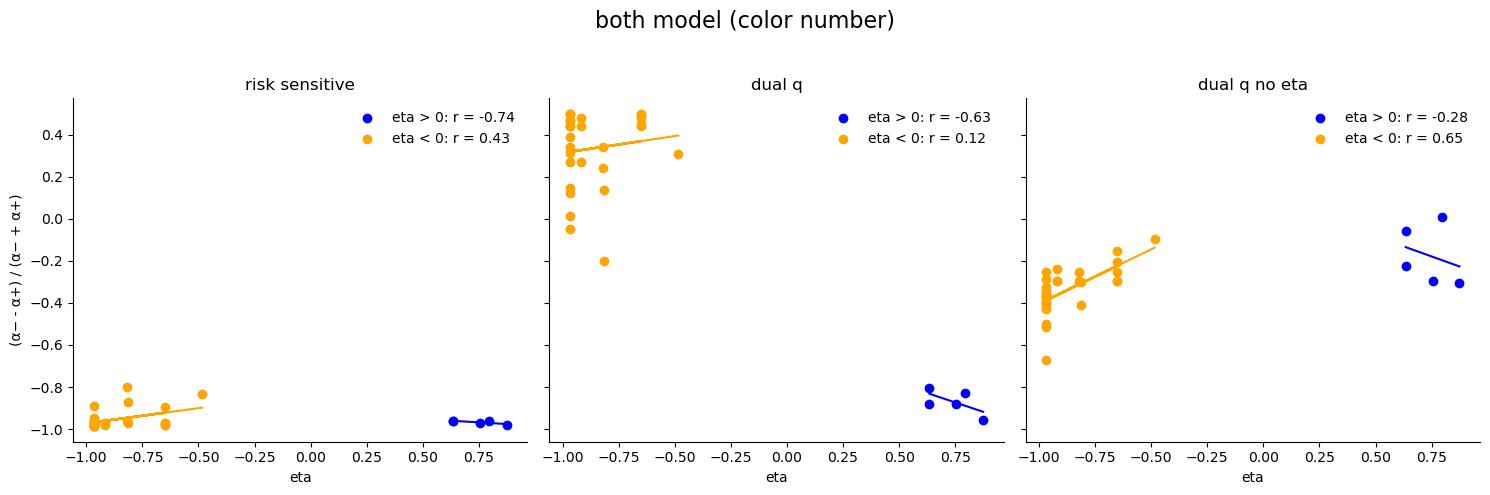

In [3]:
############################visualization############################
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# --- Risk Sensitive ---
x = best_etas
y = (best_alphas_minus_risk_sensitive - best_alphas_plus_risk_sensitive) / (best_alphas_minus_risk_sensitive + best_alphas_plus_risk_sensitive)

mask_pos = x > 0
mask_neg = x < 0

# Positive eta
corr_pos = np.corrcoef(x[mask_pos], y[mask_pos])[0, 1]
m_pos, b_pos = np.polyfit(x[mask_pos], y[mask_pos], 1)
axes[0].scatter(x[mask_pos], y[mask_pos], color='blue', label=f"eta > 0: r = {corr_pos:.2f}")
axes[0].plot(x[mask_pos], m_pos * x[mask_pos] + b_pos, color='blue')

# Negative eta
corr_neg = np.corrcoef(x[mask_neg], y[mask_neg])[0, 1]
m_neg, b_neg = np.polyfit(x[mask_neg], y[mask_neg], 1)
axes[0].scatter(x[mask_neg], y[mask_neg], color='orange', label=f"eta < 0: r = {corr_neg:.2f}")
axes[0].plot(x[mask_neg], m_neg * x[mask_neg] + b_neg, color='orange')

axes[0].set_title("risk sensitive")
axes[0].set_xlabel("eta")
axes[0].set_ylabel("(α− - α+) / (α− + α+)")
axes[0].legend(frameon=False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# --- Dual Q ---
x = best_etas
y = (best_alphas_s_dualQ - best_alphas_r_dualQ) / (best_alphas_s_dualQ + best_alphas_r_dualQ)

mask_pos = x > 0
mask_neg = x < 0

corr_pos = np.corrcoef(x[mask_pos], y[mask_pos])[0, 1]
m_pos, b_pos = np.polyfit(x[mask_pos], y[mask_pos], 1)
axes[1].scatter(x[mask_pos], y[mask_pos], color='blue', label=f"eta > 0: r = {corr_pos:.2f}")
axes[1].plot(x[mask_pos], m_pos * x[mask_pos] + b_pos, color='blue')

corr_neg = np.corrcoef(x[mask_neg], y[mask_neg])[0, 1]
m_neg, b_neg = np.polyfit(x[mask_neg], y[mask_neg], 1)
axes[1].scatter(x[mask_neg], y[mask_neg], color='orange', label=f"eta < 0: r = {corr_neg:.2f}")
axes[1].plot(x[mask_neg], m_neg * x[mask_neg] + b_neg, color='orange')

axes[1].set_title("dual q")
axes[1].set_xlabel("eta")
axes[1].legend(frameon=False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# --- Dual Q No Eta ---
x = best_etas
y = (best_alphas_s_dualQ_no_eta - best_alphas_r_dualQ_no_eta) / (best_alphas_s_dualQ_no_eta + best_alphas_r_dualQ_no_eta)

mask_pos = x > 0
mask_neg = x < 0

corr_pos = np.corrcoef(x[mask_pos], y[mask_pos])[0, 1]
m_pos, b_pos = np.polyfit(x[mask_pos], y[mask_pos], 1)
axes[2].scatter(x[mask_pos], y[mask_pos], color='blue', label=f"eta > 0: r = {corr_pos:.2f}")
axes[2].plot(x[mask_pos], m_pos * x[mask_pos] + b_pos, color='blue')

corr_neg = np.corrcoef(x[mask_neg], y[mask_neg])[0, 1]
m_neg, b_neg = np.polyfit(x[mask_neg], y[mask_neg], 1)
axes[2].scatter(x[mask_neg], y[mask_neg], color='orange', label=f"eta < 0: r = {corr_neg:.2f}")
axes[2].plot(x[mask_neg], m_neg * x[mask_neg] + b_neg, color='orange')

axes[2].set_title("dual q no eta")
axes[2].set_xlabel("eta")
axes[2].legend(frameon=False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Global title and layout
plt.suptitle("both model (color number)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
filename = os.path.join(output_dir, "models_evaluation_corr_eta_alphas_both_separate.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")
plt.show()


# numbers model

Saved: 14_RL_agent_TDlearn_output_model_comparison_niv_paper\models_evaluation_corr_eta_alphas_number.pdf


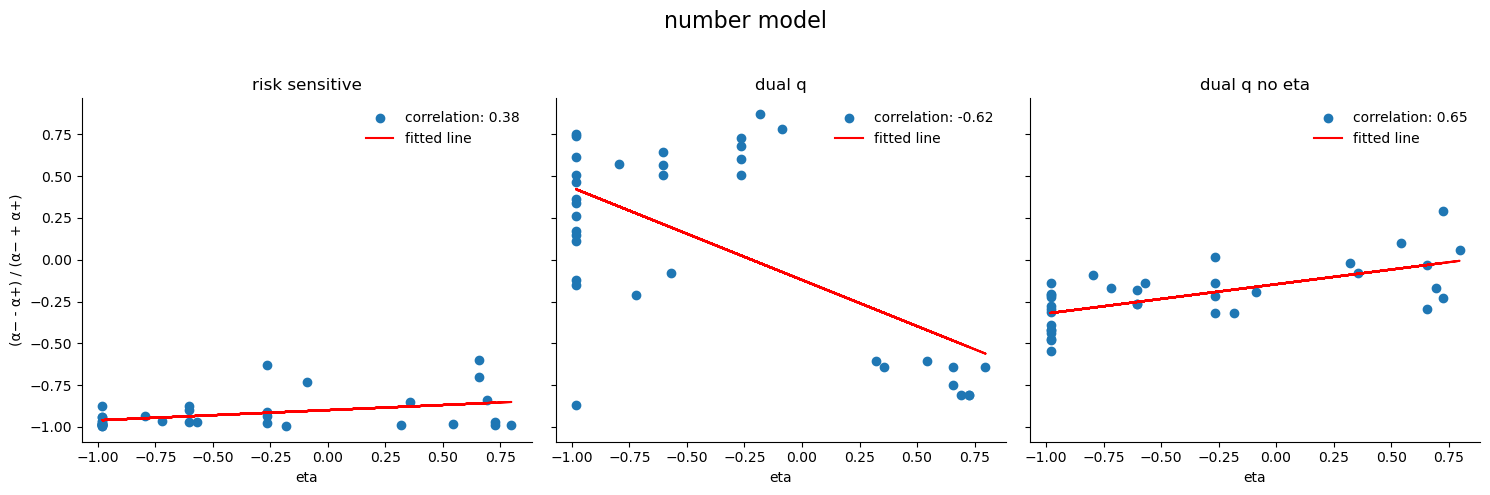

In [4]:
file_dualQ = "12_RL_agent_TDlearn_output_risk_dualQ/models_evaluation.csv"
file_risk_sensitive = "12_RL_agent_TDlearn_output_risk_sensitive/models_evaluation.csv"
file_dualQ_no_eta = "12_RL_agent_TDlearn_output_risk_dualQ_no_eta/models_evaluation.csv"


df_dualQ = pd.read_csv(file_dualQ)
df_risk_sensitive = pd.read_csv(file_risk_sensitive)
df_dualQ_no_eta = pd.read_csv(file_dualQ_no_eta)


best_etas = df_dualQ["best_eta"]


best_alphas_r_dualQ = df_dualQ["best_alpha_r"]
best_alphas_s_dualQ = df_dualQ["best_alpha_s"]


best_alphas_r_dualQ_no_eta = df_dualQ_no_eta["best_alpha_r"]
best_alphas_s_dualQ_no_eta = df_dualQ_no_eta["best_alpha_s"]


best_alphas_plus_risk_sensitive = df_risk_sensitive["best_alpha_plus"]
best_alphas_minus_risk_sensitive = df_risk_sensitive["best_alpha_minus"]




############################visualization############################
############################visualization############################

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Risk Sensitive
x_risk_sensitive = best_etas
y_risk_sensitive = (best_alphas_minus_risk_sensitive - best_alphas_plus_risk_sensitive) / (best_alphas_minus_risk_sensitive + best_alphas_plus_risk_sensitive)
corr_risk_sensitive = np.corrcoef(x_risk_sensitive, y_risk_sensitive)[0, 1]
axes[0].scatter(x_risk_sensitive, y_risk_sensitive, label=f"correlation: {corr_risk_sensitive:.2f}")
m, b = np.polyfit(x_risk_sensitive, y_risk_sensitive, 1)
axes[0].plot(x_risk_sensitive, m * x_risk_sensitive + b, color='red', label="fitted line")
axes[0].set_title("risk sensitive")
axes[0].set_xlabel("eta")
axes[0].set_ylabel("(α− - α+) / (α− + α+)")
axes[0].legend(frameon=False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Dual Q
x_dualQ = best_etas
y_dualQ = (best_alphas_s_dualQ - best_alphas_r_dualQ) / (best_alphas_s_dualQ + best_alphas_r_dualQ)
corr_dualQ = np.corrcoef(x_dualQ, y_dualQ)[0, 1]
axes[1].scatter(x_dualQ, y_dualQ, label=f"correlation: {corr_dualQ:.2f}")
m, b = np.polyfit(x_dualQ, y_dualQ, 1)
axes[1].plot(x_dualQ, m * x_dualQ + b, color='red', label="fitted line")
axes[1].set_title("dual q")
axes[1].set_xlabel("eta")
axes[1].legend(frameon=False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Dual Q No Eta
x_dualQ_no_eta = best_etas
y_dualQ_no_eta = (best_alphas_s_dualQ_no_eta - best_alphas_r_dualQ_no_eta) / (best_alphas_s_dualQ_no_eta + best_alphas_r_dualQ_no_eta)
corr_dualQ_no_eta = np.corrcoef(x_dualQ_no_eta, y_dualQ_no_eta)[0, 1]
axes[2].scatter(x_dualQ_no_eta, y_dualQ_no_eta, label=f"correlation: {corr_dualQ_no_eta:.2f}")
m, b = np.polyfit(x_dualQ_no_eta, y_dualQ_no_eta, 1)
axes[2].plot(x_dualQ_no_eta, m * x_dualQ_no_eta + b, color='red', label="fitted line")
axes[2].set_title("dual q no eta")
axes[2].set_xlabel("eta")
axes[2].legend(frameon=False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

plt.suptitle("number model", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
filename = os.path.join(output_dir, "models_evaluation_corr_eta_alphas_number.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")
plt.show()


Saved: 14_RL_agent_TDlearn_output_model_comparison_niv_paper\models_evaluation_corr_eta_alphas_number_separate.pdf


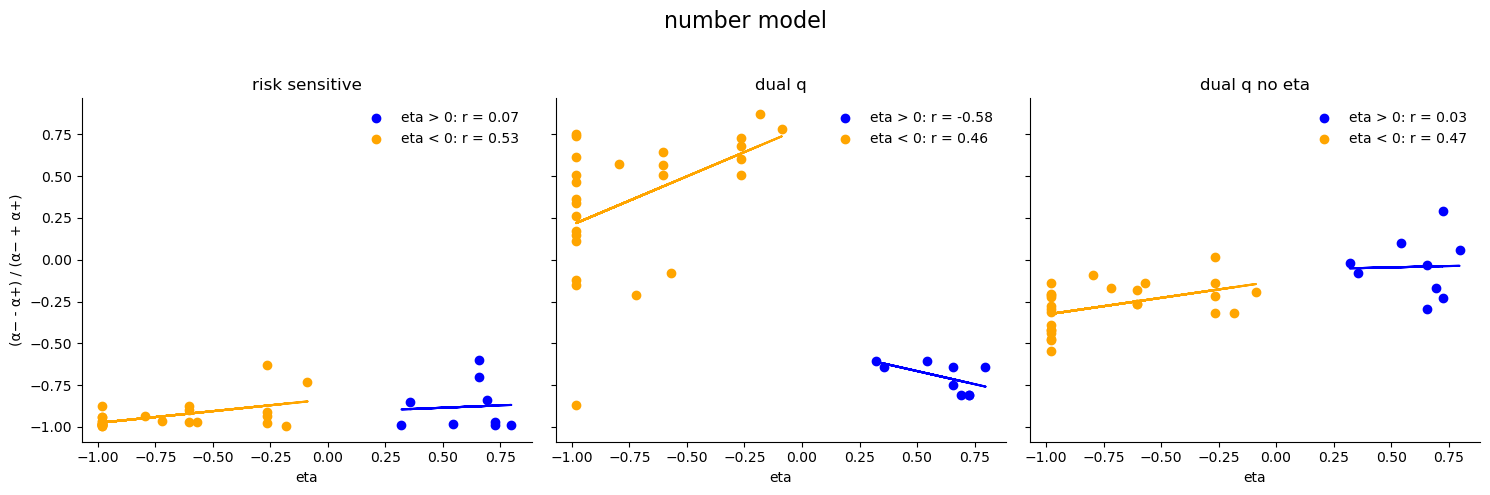

In [5]:
############################visualization############################
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# --- Risk Sensitive ---
x = best_etas
y = (best_alphas_minus_risk_sensitive - best_alphas_plus_risk_sensitive) / (best_alphas_minus_risk_sensitive + best_alphas_plus_risk_sensitive)

mask_pos = x > 0
mask_neg = x < 0

# Positive eta
corr_pos = np.corrcoef(x[mask_pos], y[mask_pos])[0, 1]
m_pos, b_pos = np.polyfit(x[mask_pos], y[mask_pos], 1)
axes[0].scatter(x[mask_pos], y[mask_pos], color='blue', label=f"eta > 0: r = {corr_pos:.2f}")
axes[0].plot(x[mask_pos], m_pos * x[mask_pos] + b_pos, color='blue')

# Negative eta
corr_neg = np.corrcoef(x[mask_neg], y[mask_neg])[0, 1]
m_neg, b_neg = np.polyfit(x[mask_neg], y[mask_neg], 1)
axes[0].scatter(x[mask_neg], y[mask_neg], color='orange', label=f"eta < 0: r = {corr_neg:.2f}")
axes[0].plot(x[mask_neg], m_neg * x[mask_neg] + b_neg, color='orange')

axes[0].set_title("risk sensitive")
axes[0].set_xlabel("eta")
axes[0].set_ylabel("(α− - α+) / (α− + α+)")
axes[0].legend(frameon=False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# --- Dual Q ---
x = best_etas
y = (best_alphas_s_dualQ - best_alphas_r_dualQ) / (best_alphas_s_dualQ + best_alphas_r_dualQ)

mask_pos = x > 0
mask_neg = x < 0

corr_pos = np.corrcoef(x[mask_pos], y[mask_pos])[0, 1]
m_pos, b_pos = np.polyfit(x[mask_pos], y[mask_pos], 1)
axes[1].scatter(x[mask_pos], y[mask_pos], color='blue', label=f"eta > 0: r = {corr_pos:.2f}")
axes[1].plot(x[mask_pos], m_pos * x[mask_pos] + b_pos, color='blue')

corr_neg = np.corrcoef(x[mask_neg], y[mask_neg])[0, 1]
m_neg, b_neg = np.polyfit(x[mask_neg], y[mask_neg], 1)
axes[1].scatter(x[mask_neg], y[mask_neg], color='orange', label=f"eta < 0: r = {corr_neg:.2f}")
axes[1].plot(x[mask_neg], m_neg * x[mask_neg] + b_neg, color='orange')

axes[1].set_title("dual q")
axes[1].set_xlabel("eta")
axes[1].legend(frameon=False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# --- Dual Q No Eta ---
x = best_etas
y = (best_alphas_s_dualQ_no_eta - best_alphas_r_dualQ_no_eta) / (best_alphas_s_dualQ_no_eta + best_alphas_r_dualQ_no_eta)

mask_pos = x > 0
mask_neg = x < 0

corr_pos = np.corrcoef(x[mask_pos], y[mask_pos])[0, 1]
m_pos, b_pos = np.polyfit(x[mask_pos], y[mask_pos], 1)
axes[2].scatter(x[mask_pos], y[mask_pos], color='blue', label=f"eta > 0: r = {corr_pos:.2f}")
axes[2].plot(x[mask_pos], m_pos * x[mask_pos] + b_pos, color='blue')

corr_neg = np.corrcoef(x[mask_neg], y[mask_neg])[0, 1]
m_neg, b_neg = np.polyfit(x[mask_neg], y[mask_neg], 1)
axes[2].scatter(x[mask_neg], y[mask_neg], color='orange', label=f"eta < 0: r = {corr_neg:.2f}")
axes[2].plot(x[mask_neg], m_neg * x[mask_neg] + b_neg, color='orange')

axes[2].set_title("dual q no eta")
axes[2].set_xlabel("eta")
axes[2].legend(frameon=False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Global title and layout
plt.suptitle("number model", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
filename = os.path.join(output_dir, "models_evaluation_corr_eta_alphas_number_separate.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")
plt.show()


# color model

Saved: 14_RL_agent_TDlearn_output_model_comparison_niv_paper\models_evaluation_corr_eta_alphas_color.pdf


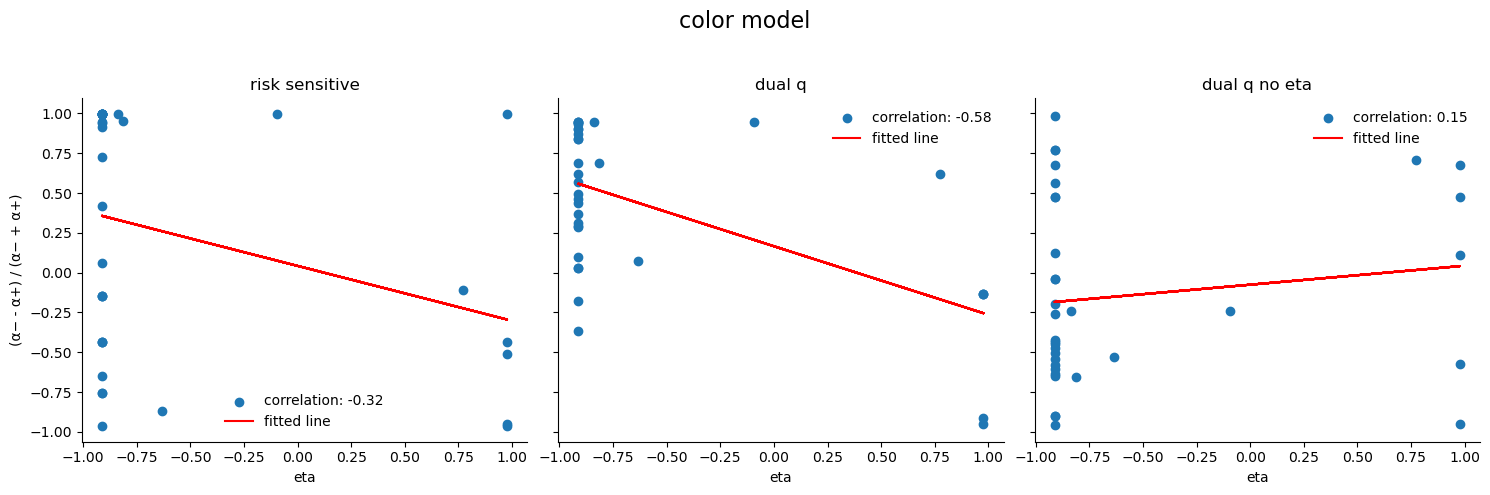

In [6]:
output_dir = r"14_RL_agent_TDlearn_output_model_comparison_niv_paper"
os.makedirs(output_dir, exist_ok=True)

file_dualQ = "11_RL_agent_TDlearn_output_risk_dualQ/models_evaluation.csv"
file_risk_sensitive = "11_RL_agent_TDlearn_output_risk_sensitive/models_evaluation.csv"
file_dualQ_no_eta = "11_RL_agent_TDlearn_output_risk_dualQ_no_eta/models_evaluation.csv"


df_dualQ = pd.read_csv(file_dualQ)
df_risk_sensitive = pd.read_csv(file_risk_sensitive)
df_dualQ_no_eta = pd.read_csv(file_dualQ_no_eta)


best_etas = df_dualQ["best_eta"]


best_alphas_r_dualQ = df_dualQ["best_alpha_r"]
best_alphas_s_dualQ = df_dualQ["best_alpha_s"]


best_alphas_r_dualQ_no_eta = df_dualQ_no_eta["best_alpha_r"]
best_alphas_s_dualQ_no_eta = df_dualQ_no_eta["best_alpha_s"]


best_alphas_plus_risk_sensitive = df_risk_sensitive["best_alpha_plus"]
best_alphas_minus_risk_sensitive = df_risk_sensitive["best_alpha_minus"]




############################visualization############################
############################visualization############################

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Risk Sensitive
x_risk_sensitive = best_etas
y_risk_sensitive = (best_alphas_minus_risk_sensitive - best_alphas_plus_risk_sensitive) / (best_alphas_minus_risk_sensitive + best_alphas_plus_risk_sensitive)
corr_risk_sensitive = np.corrcoef(x_risk_sensitive, y_risk_sensitive)[0, 1]
axes[0].scatter(x_risk_sensitive, y_risk_sensitive, label=f"correlation: {corr_risk_sensitive:.2f}")
m, b = np.polyfit(x_risk_sensitive, y_risk_sensitive, 1)
axes[0].plot(x_risk_sensitive, m * x_risk_sensitive + b, color='red', label="fitted line")
axes[0].set_title("risk sensitive")
axes[0].set_xlabel("eta")
axes[0].set_ylabel("(α− - α+) / (α− + α+)")
axes[0].legend(frameon=False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Dual Q
x_dualQ = best_etas
y_dualQ = (best_alphas_s_dualQ - best_alphas_r_dualQ) / (best_alphas_s_dualQ + best_alphas_r_dualQ)
corr_dualQ = np.corrcoef(x_dualQ, y_dualQ)[0, 1]
axes[1].scatter(x_dualQ, y_dualQ, label=f"correlation: {corr_dualQ:.2f}")
m, b = np.polyfit(x_dualQ, y_dualQ, 1)
axes[1].plot(x_dualQ, m * x_dualQ + b, color='red', label="fitted line")
axes[1].set_title("dual q")
axes[1].set_xlabel("eta")
axes[1].legend(frameon=False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Dual Q No Eta
x_dualQ_no_eta = best_etas
y_dualQ_no_eta = (best_alphas_s_dualQ_no_eta - best_alphas_r_dualQ_no_eta) / (best_alphas_s_dualQ_no_eta + best_alphas_r_dualQ_no_eta)
corr_dualQ_no_eta = np.corrcoef(x_dualQ_no_eta, y_dualQ_no_eta)[0, 1]
axes[2].scatter(x_dualQ_no_eta, y_dualQ_no_eta, label=f"correlation: {corr_dualQ_no_eta:.2f}")
m, b = np.polyfit(x_dualQ_no_eta, y_dualQ_no_eta, 1)
axes[2].plot(x_dualQ_no_eta, m * x_dualQ_no_eta + b, color='red', label="fitted line")
axes[2].set_title("dual q no eta")
axes[2].set_xlabel("eta")
axes[2].legend(frameon=False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

plt.suptitle("color model", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
filename = os.path.join(output_dir, "models_evaluation_corr_eta_alphas_color.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()


Saved: 14_RL_agent_TDlearn_output_model_comparison_niv_paper\models_evaluation_corr_eta_alphas_color_separate.pdf


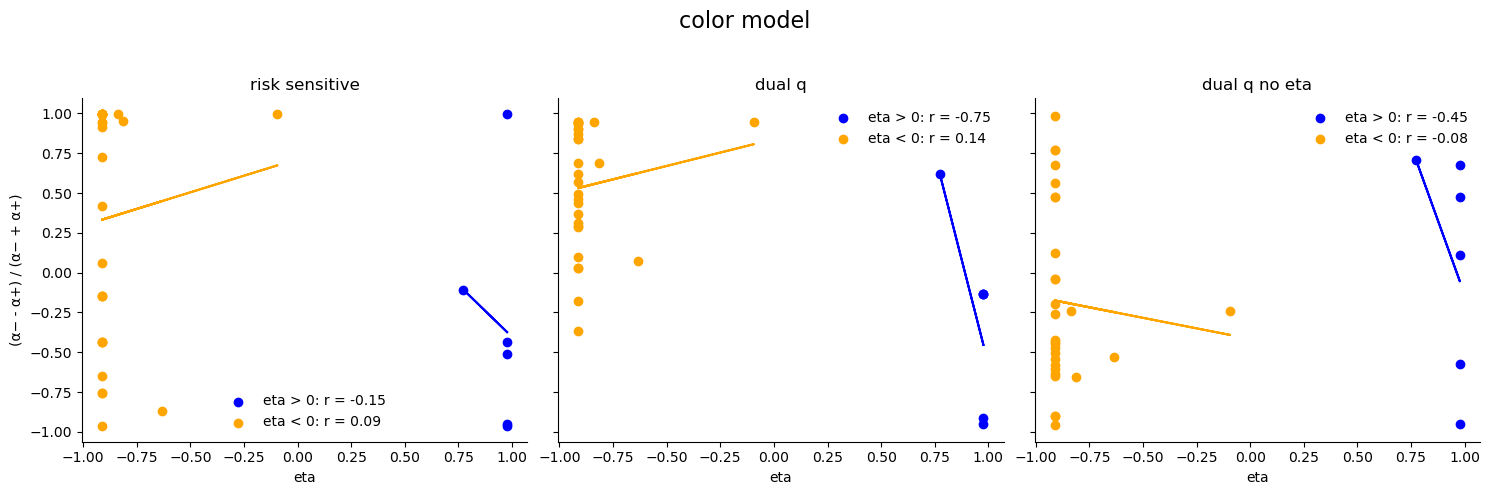

In [7]:
############################visualization############################
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# --- Risk Sensitive ---
x = best_etas
y = (best_alphas_minus_risk_sensitive - best_alphas_plus_risk_sensitive) / (best_alphas_minus_risk_sensitive + best_alphas_plus_risk_sensitive)

mask_pos = x > 0
mask_neg = x < 0

# Positive eta
corr_pos = np.corrcoef(x[mask_pos], y[mask_pos])[0, 1]
m_pos, b_pos = np.polyfit(x[mask_pos], y[mask_pos], 1)
axes[0].scatter(x[mask_pos], y[mask_pos], color='blue', label=f"eta > 0: r = {corr_pos:.2f}")
axes[0].plot(x[mask_pos], m_pos * x[mask_pos] + b_pos, color='blue')

# Negative eta
corr_neg = np.corrcoef(x[mask_neg], y[mask_neg])[0, 1]
m_neg, b_neg = np.polyfit(x[mask_neg], y[mask_neg], 1)
axes[0].scatter(x[mask_neg], y[mask_neg], color='orange', label=f"eta < 0: r = {corr_neg:.2f}")
axes[0].plot(x[mask_neg], m_neg * x[mask_neg] + b_neg, color='orange')

axes[0].set_title("risk sensitive")
axes[0].set_xlabel("eta")
axes[0].set_ylabel("(α− - α+) / (α− + α+)")
axes[0].legend(frameon=False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# --- Dual Q ---
x = best_etas
y = (best_alphas_s_dualQ - best_alphas_r_dualQ) / (best_alphas_s_dualQ + best_alphas_r_dualQ)

mask_pos = x > 0
mask_neg = x < 0

corr_pos = np.corrcoef(x[mask_pos], y[mask_pos])[0, 1]
m_pos, b_pos = np.polyfit(x[mask_pos], y[mask_pos], 1)
axes[1].scatter(x[mask_pos], y[mask_pos], color='blue', label=f"eta > 0: r = {corr_pos:.2f}")
axes[1].plot(x[mask_pos], m_pos * x[mask_pos] + b_pos, color='blue')

corr_neg = np.corrcoef(x[mask_neg], y[mask_neg])[0, 1]
m_neg, b_neg = np.polyfit(x[mask_neg], y[mask_neg], 1)
axes[1].scatter(x[mask_neg], y[mask_neg], color='orange', label=f"eta < 0: r = {corr_neg:.2f}")
axes[1].plot(x[mask_neg], m_neg * x[mask_neg] + b_neg, color='orange')

axes[1].set_title("dual q")
axes[1].set_xlabel("eta")
axes[1].legend(frameon=False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# --- Dual Q No Eta ---
x = best_etas
y = (best_alphas_s_dualQ_no_eta - best_alphas_r_dualQ_no_eta) / (best_alphas_s_dualQ_no_eta + best_alphas_r_dualQ_no_eta)

mask_pos = x > 0
mask_neg = x < 0

corr_pos = np.corrcoef(x[mask_pos], y[mask_pos])[0, 1]
m_pos, b_pos = np.polyfit(x[mask_pos], y[mask_pos], 1)
axes[2].scatter(x[mask_pos], y[mask_pos], color='blue', label=f"eta > 0: r = {corr_pos:.2f}")
axes[2].plot(x[mask_pos], m_pos * x[mask_pos] + b_pos, color='blue')

corr_neg = np.corrcoef(x[mask_neg], y[mask_neg])[0, 1]
m_neg, b_neg = np.polyfit(x[mask_neg], y[mask_neg], 1)
axes[2].scatter(x[mask_neg], y[mask_neg], color='orange', label=f"eta < 0: r = {corr_neg:.2f}")
axes[2].plot(x[mask_neg], m_neg * x[mask_neg] + b_neg, color='orange')

axes[2].set_title("dual q no eta")
axes[2].set_xlabel("eta")
axes[2].legend(frameon=False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Global title and layout
plt.suptitle("color model", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
filename = os.path.join(output_dir, "models_evaluation_corr_eta_alphas_color_separate.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")
plt.show()
